# Data Exploration Notebook

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

In [3]:
# Loading the dataset
df = pd.read_csv("datasets/dataset.csv")

In [4]:
# Visualizing the first few (5) rows of the data
df.head()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,number_of_at_in_url,number_of_dollar_in_url,number_of_exclamation_in_url,number_of_hashtag_in_url,number_of_percent_in_url,domain_length,number_of_dots_in_domain,number_of_hyphens_in_domain,having_special_characters_in_domain,number_of_special_characters_in_domain,having_digits_in_domain,number_of_digits_in_domain,having_repeated_digits_in_domain,number_of_subdomains,having_dot_in_subdomain,having_hyphen_in_subdomain,average_subdomain_length,average_number_of_dots_in_subdomain,average_number_of_hyphens_in_subdomain,having_special_characters_in_subdomain,number_of_special_characters_in_subdomain,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,0,0,0,0,0,0,12,2,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,0,0,0,0,0,0,26,5,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,1,0,0,0,0,0,21,2,0,0,0,1,6,0,2,0,0,7.0,0,0,1,3,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,0,0,0,0,0,0,16,3,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,3,0,0,0,4.103538,2.952820


In [5]:
# Checking the shape of the datset
df.shape

(247950, 42)

In [6]:
# Checking if there are null, infinity or duplicate values in the datset
print("Number of null values:", df.isna().values.sum())
print("Number of duplicate values:", df.duplicated().sum())
print("Number of infinty values:", df.infer_objects().isin([np.inf, -np.inf]).values.sum())

Number of null values: 0
Number of duplicate values: 118172
Number of infinty values: 0


In [7]:
# Dropping the duplicated values from the dataset
df.drop_duplicates(inplace=True)

In [8]:
# Checking if duplicated were dropped successfully
print(df.duplicated().values.any())
print("New data shape:", df.shape)

False
New data shape: (129778, 42)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129778 entries, 0 to 247939
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       129778 non-null  int64  
 1   url_length                                 129778 non-null  int64  
 2   number_of_dots_in_url                      129778 non-null  int64  
 3   having_repeated_digits_in_url              129778 non-null  int64  
 4   number_of_digits_in_url                    129778 non-null  int64  
 5   number_of_special_char_in_url              129778 non-null  int64  
 6   number_of_hyphens_in_url                   129778 non-null  int64  
 7   number_of_underline_in_url                 129778 non-null  int64  
 8   number_of_slash_in_url                     129778 non-null  int64  
 9   number_of_questionmark_in_url              129778 non-null  int64  
 10  number_of_equ

# 🔍 Exploratory Data Analysis (EDA)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

### Checking the dependent variable distribution

In [19]:
df["Type"].value_counts()

Type
0    66755
1    63023
Name: count, dtype: int64

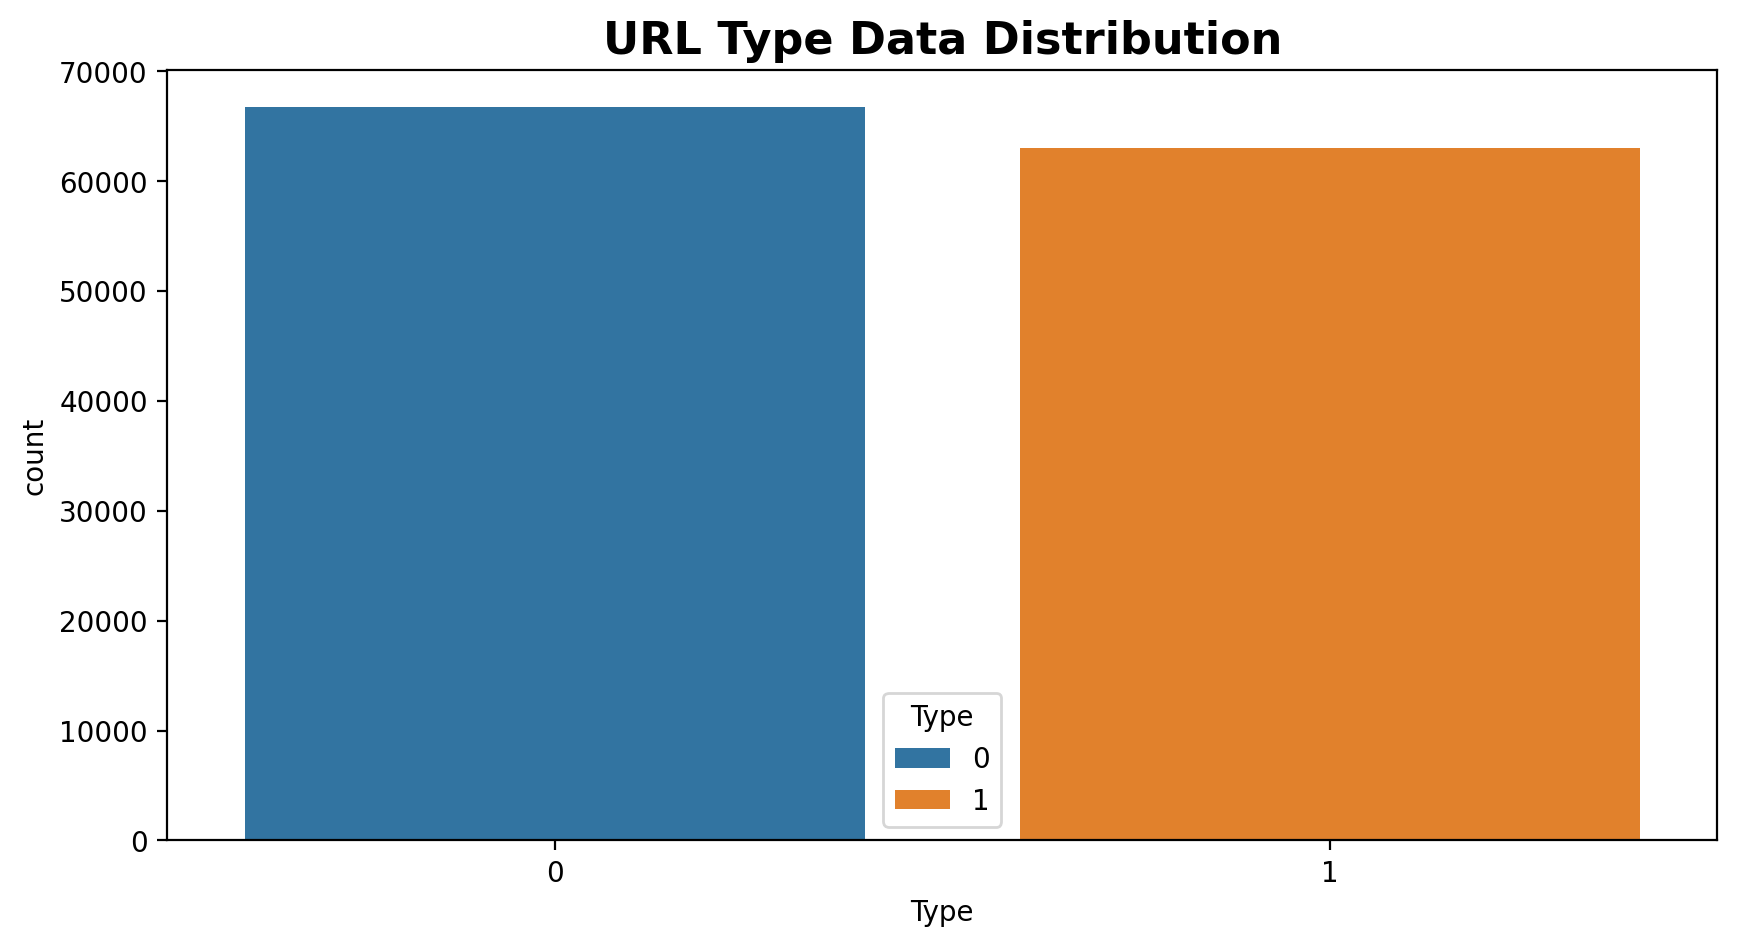

In [20]:
# Visualizing the dependent variable ("Type") distribution
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="Type", hue="Type")
plt.title("URL Type Data Distribution", fontsize=16, fontweight="bold")
# plt.savefig("./plots/data-distribution.png")
plt.show()

### Relationship between Top-level Domain and URL Type

In [21]:
# Relationship between tld and URL_Type_obf_Type
# plt.figure(figsize=(10, 5), dpi=200)
# sns.countplot(data=df, x="tld", hue="URL_Type_obf_Type")
# plt.title("TLD vs URL Type", fontsize=16, fontweight="bold")
# plt.xticks(rotation=90)
# plt.ylabel("Number of URLs")
# plt.savefig("./plots/tld-vs-url-type.png")
# plt.show()

From the relationship between tld (top-level domain) and url type, most benign urls have 1 (one) tld.

### Relationship between SymbolCountDomain (number of symbols in the domain name) and URL Type

In [22]:
# Relationship between URL_Type_obf_Type and SymbolCount_Domain
# plt.figure(figsize=(10, 5), dpi=200)
# sns.countplot(data=df, x="SymbolCount_Domain", hue="URL_Type_obf_Type")
# plt.title("Symbol Count in Domain vs URL Type", fontsize=16, fontweight="bold")
# plt.xticks(rotation=90)
# plt.ylabel("Number of URLs")
# plt.savefig("./plots/symbol-count-domain-vs-url-type.png")
# plt.show()

Most benign urls have one symbol in the domain name

### Relationship between SymbolCount_URL and URL Type

In [23]:
# Relationship between URL_Type_obf_Type and SymbolCount_URL
# plt.figure(figsize=(10, 5), dpi=200)
# sns.countplot(data=df, x="SymbolCount_URL", hue="URL_Type_obf_Type")
# plt.title("Symbol Count in URLmain vs URL Type", fontsize=16, fontweight="bold")
# plt.xticks(rotation=90)
# plt.ylabel("Number of URLs")
# plt.savefig("./plots/symbol-count-url-vs-url-type.png")
# plt.show()

### Relationship between domainlength and URL Type

In [24]:
# Relationship between domainlength and URL Type
# plt.figure(figsize=(10, 5), dpi=200)
# sns.countplot(data=df, x="domainlength", hue="URL_Type_obf_Type")
# plt.title("Domain Length vs URL Type", fontsize=16, fontweight="bold")
# plt.xticks(rotation=90)
# plt.ylabel("Number of URLs")
# plt.savefig("./plots/domain-length-vs-url-type.png")
# plt.show()

URLs with lower domain length are mostly benign

### Saving the cleaned version of the dataset

In [25]:
# Saving the cleaned dataset
df.to_csv("datasets/cleaned_data2.csv")